# Introduction to NLP



### Exploring and Processing Text Data
Various methods and techniques to preprocess the text data along with exploratory data analysis.

In [1]:
text = ['This is introduction to NLP',
        'It is likely to be useful, to people ',
        'Machine learning is the new electricity',
        'There would be less hype around AI and more action going forward',
        'python is the best tool!',
        'R is good language',
        'I like this training session',
        'I want more books like this']


In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame({'tweet':text})
df

,tweet
0,This is introduction to NLP
1,"It is likely to be useful, to people"
2,Machine learning is the new electricity
3,There would be less hype around AI and more ac...
4,python is the best tool!
5,R is good language
6,I like this training session
7,I want more books like this


In [4]:
# Convert to Lowercase using lower()

x = 'TeStinG'
x

'TeStinG'

In [5]:
x.lower()

'testing'

In [6]:
lowerCase = pd.DataFrame();
lowerCase['tweet'] = df['tweet'].apply(lambda x: ' '.join(x.lower() for x in x.split()))
lowerCase

,tweet
0,this is introduction to nlp
1,"it is likely to be useful, to people"
2,machine learning is the new electricity
3,there would be less hype around ai and more ac...
4,python is the best tool!
5,r is good language
6,i like this training session
7,i want more books like this


In [7]:
# Removal of punctuation using regex and replace()

import re

In [8]:
s = 'I. Like. This Training!'
s

'I. Like. This Training!'

Function:

re.sub(pattern, repl, string): This function is used for finding and replacing patterns within a string using regular expressions.
Arguments:

pattern: The regular expression pattern to match.
repl: The replacement string to substitute for matched patterns.
string: The input string to search and modify.
Specific Breakdown:

r'[^\w\s]': The regular expression pattern:

^: Matches characters that do not match the following character class.

\w: Matches word characters (letters, digits, and underscores).

\s: Matches whitespace characters (spaces, tabs, newlines).

Combined, it matches any character that is not a word character or a whitespace character (i.e., punctuation, symbols, etc.).

'': The empty replacement string, meaning any matched characters will be removed.

s: The input string to be processed.

Functionality:

The code finds all characters in the string s that are not word characters or whitespace characters and removes them.
It returns a new string with those characters removed.

In [9]:
re.sub(r'[^\w\s]', '', s)

'I Like This Training'

In [10]:
punctuationRemoved = pd.DataFrame();
punctuationRemoved['tweet'] = df['tweet'].str.replace('[^\w\s]', '')
punctuationRemoved

C:\Users\hp\AppData\Local\Temp\ipykernel_19012\471680623.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  punctuationRemoved['tweet'] = df['tweet'].str.replace('[^\w\s]', '')


,tweet
0,This is introduction to NLP
1,It is likely to be useful to people
2,Machine learning is the new electricity
3,There would be less hype around AI and more ac...
4,python is the best tool
5,R is good language
6,I like this training session
7,I want more books like this


In [11]:
import string

In [12]:
s = 'I. Like. This Training!'
s

'I. Like. This Training!'

In [13]:
for c in string.punctuation:
    s = s.replace(c, '')
    
s

'I Like This Training'

In [14]:
# Remove the stop words

import nltk
from nltk.corpus import stopwords

In [15]:
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
stopwordsRemoved = pd.DataFrame();
stopwordsRemoved['tweet'] = lowerCase['tweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))
stopwordsRemoved

,tweet
0,introduction nlp
1,"likely useful, people"
2,machine learning new electricity
3,would less hype around ai action going forward
4,python best tool!
5,r good language
6,like training session
7,want books like


In [17]:
# standardizing text (short words or abbreviations)

lookupDict = {'nlp': 'natural language processing',
             'ur': 'your',
             'wbu': 'what about you'}

lookupDict

{'nlp': 'natural language processing', 'ur': 'your', 'wbu': 'what about you'}

In [18]:
def standardizeText(inputText):
    words = inputText.split()
    newWords = []
    for w in words:
        w = re.sub(r'[^\w\s]', '', w)
        if w.lower() in lookupDict:
            w = lookupDict[w.lower()]
            newWords.append(w)
            newText = ' '.join(newWords)
    return newText
        

In [19]:
standardizeText("I like NLP it's ur choice")

'natural language processing your'

In [20]:
# Spelling correction

text2 = ['This is introduction to NLP',
        'It is likely to be useful, to people ',
        'Machine learning is the new elcctricty',
        'There would be less hype around AI and more action going forward',
        'python is the best tool!',
        'R is good laangauage',
        'I like this training session',
        'I want more books like this']

text2

['This is introduction to NLP',
 'It is likely to be useful, to people ',
 'Machine learning is the new elcctricty',
 'There would be less hype around AI and more action going forward',
 'python is the best tool!',
 'R is good laangauage',
 'I like this training session',
 'I want more books like this']

In [21]:
df2 = pd.DataFrame({'tweet':text2})
df2

,tweet
0,This is introduction to NLP
1,"It is likely to be useful, to people"
2,Machine learning is the new elcctricty
3,There would be less hype around AI and more ac...
4,python is the best tool!
5,R is good laangauage
6,I like this training session
7,I want more books like this


In [22]:
from textblob import TextBlob

In [23]:
spellingCorrected = pd.DataFrame()
spellingCorrected['tweet'] = df2['tweet'].apply(lambda x: str(TextBlob(x).correct()))
spellingCorrected

,tweet
0,His is introduction to NLP
1,"It is likely to be useful, to people"
2,Machine learning is the new electricity
3,There would be less hope around of and more ac...
4,patron is the best tool!
5,R is good language
6,I like this training session
7,I want more books like this


In [25]:
# Text tokenizing

df['tweet'][3]

'There would be less hype around AI and more action going forward'

In [26]:
#TextBlob
TextBlob(df['tweet'][3]).words

WordList(['There', 'would', 'be', 'less', 'hype', 'around', 'AI', 'and', 'more', 'action', 'going', 'forward'])

In [27]:
#NLTK

nltk.word_tokenize(df['tweet'][3])

['There',
 'would',
 'be',
 'less',
 'hype',
 'around',
 'AI',
 'and',
 'more',
 'action',
 'going',
 'forward']

In [28]:
myString = df['tweet'][3]
myString.split()

['There',
 'would',
 'be',
 'less',
 'hype',
 'around',
 'AI',
 'and',
 'more',
 'action',
 'going',
 'forward']

In [29]:
#Stemming

text3 = ['I like fishing',
        'I dont eat fish',
        'There are many fishes in the pond']

text3

['I like fishing', 'I dont eat fish', 'There are many fishes in the pond']

In [30]:
df3 = pd.DataFrame({'tweet': text3})
df3

,tweet
0,I like fishing
1,I dont eat fish
2,There are many fishes in the pond


In [31]:
from nltk.stem import PorterStemmer

In [32]:
pst = PorterStemmer()

In [33]:
stemmed = pd.DataFrame()
stemmed['tweet'] = df3['tweet'].apply(lambda x: ' '.join([pst.stem(word) for word in x.split()]))
stemmed

,tweet
0,i like fish
1,i dont eat fish
2,there are mani fish in the pond


In [34]:
#Lemmatization

text4 = ['I like fishing',
        'I dont eat fish',
        'There are many fishes in the pond',
        'leaves and leaf']

df4 = pd.DataFrame({'tweet': text4})
df4

,tweet
0,I like fishing
1,I dont eat fish
2,There are many fishes in the pond
3,leaves and leaf


In [35]:
from textblob import Word

In [36]:
lemmatized = pd.DataFrame()
lemmatized['tweet'] = df4['tweet'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))
lemmatized

,tweet
0,I like fishing
1,I dont eat fish
2,There are many fish in the pond
3,leaf and leaf


In [37]:
#exploring the text dataset

from nltk.corpus import webtext
nltk.download('webtext')

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\webtext.zip.


True

In [38]:
webTextScentences = webtext.sents('firefox.txt')
webTextScentences

[['Cookie', 'Manager', ':', '"', 'Don', "'", 't', 'allow', 'sites', 'that', 'set', 'removed', 'cookies', 'to', 'set', 'future', 'cookies', '"', 'should', 'stay', 'checked', 'When', 'in', 'full', 'screen', 'mode', 'Pressing', 'Ctrl', '-', 'N', 'should', 'open', 'a', 'new', 'browser', 'when', 'only', 'download', 'dialog', 'is', 'left', 'open', 'add', 'icons', 'to', 'context', 'menu', 'So', 'called', '"', 'tab', 'bar', '"', 'should', 'be', 'made', 'a', 'proper', 'toolbar', 'or', 'given', 'the', 'ability', 'collapse', '/', 'expand', '.'], ['[', 'XUL', ']', 'Implement', 'Cocoa', '-', 'style', 'toolbar', 'customization', '.'], ...]

In [39]:
webTextWords = webtext.words('firefox.txt')
webTextWords

['Cookie', 'Manager', ':', '"', 'Don', "'", 't', ...]

In [40]:
from nltk.probability import FreqDist
import string

In [41]:
len(webTextScentences)

1138

In [42]:
len(webTextWords)

102457

In [43]:
freqDist = nltk.FreqDist(webTextWords)
freqDist

FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

In [44]:
sortedFreqDist = sorted(freqDist, reverse = False)
sortedFreqDist

['!',
 '!!',
 '!!!',
 '!!!!!!!!!!!!!!!!!!!!!!!!!!',
 '!"',
 "!'",
 '!)',
 '!=',
 '!?',
 '"',
 '""',
 '"$',
 '"&',
 '"(',
 '")',
 '")"',
 '"*',
 '"***',
 '"-',
 '"-"',
 '"--',
 '"-//',
 '".',
 '"..',
 '"...',
 '"..."',
 '":',
 '":"',
 '"<',
 '">',
 '">"',
 '"><',
 '">>"',
 '">]',
 '"?',
 '"?"',
 '"??????"',
 '"\\"',
 '"|"',
 '"~"',
 '"\x99"',
 '#',
 '$',
 '$(',
 '${',
 '%',
 '%%',
 '%%;',
 '%)',
 '%.',
 '%/',
 '&',
 '&#',
 '&&',
 "'",
 '\'"',
 '\'".',
 "'(",
 "')",
 "').",
 "'+'",
 "'-",
 "'.",
 "'/",
 "';",
 "'].",
 '(',
 '(!)',
 '("',
 '(%)',
 '(&',
 "('",
 "('.')",
 "('<",
 '()',
 '()"',
 '()">',
 "()'",
 '()\'"',
 '();',
 '();"',
 "();'>",
 '()]',
 '(*.*)"',
 '(*.*)")',
 '(-',
 '(.',
 '(.)',
 '(:',
 '(<',
 '(>>)',
 '(?!)',
 '(?)',
 '([',
 '(~/.',
 ')',
 ')"',
 ")'",
 ')\'"',
 ')(',
 '))',
 ').',
 ')...',
 '):',
 ');',
 ')[',
 '*',
 '******',
 '***>"',
 '**:',
 '*.',
 '+',
 '+"$@"}',
 '+#',
 '+)',
 '++',
 '++-',
 '++.',
 '++]',
 '+-',
 '+;',
 '+`)',
 '-',
 '-"',
 "-%'",
 "-'",
 '-)',

In [45]:
# words with length greater than 3

largewords = dict([(k, v) for k, v in freqDist.items() if len(k) > 3])
largewords

{'Cookie': 22,
 'Manager': 179,
 'allow': 53,
 'sites': 63,
 'that': 145,
 'removed': 21,
 'cookies': 57,
 'future': 4,
 'should': 461,
 'stay': 21,
 'checked': 22,
 'When': 132,
 'full': 38,
 'screen': 101,
 'mode': 51,
 'Pressing': 9,
 'Ctrl': 96,
 'open': 479,
 'browser': 392,
 'when': 1255,
 'only': 139,
 'download': 297,
 'dialog': 330,
 'left': 75,
 'icons': 106,
 'context': 104,
 'menu': 462,
 'called': 16,
 'made': 16,
 'proper': 6,
 'toolbar': 364,
 'given': 15,
 'ability': 25,
 'collapse': 15,
 'expand': 29,
 'Implement': 25,
 'Cocoa': 1,
 'style': 40,
 'customization': 16,
 'ifdefs': 3,
 'MOZ_PHOENIX': 4,
 'customize': 39,
 'small': 45,
 'nightly': 28,
 'builds': 45,
 'tinderboxen': 1,
 'Phoenix': 186,
 'finish': 7,
 'tearing': 1,
 'prefs': 33,
 'pieces': 1,
 'then': 40,
 'make': 47,
 'suck': 3,
 'mozbrowser': 2,
 'script': 21,
 'doesn': 453,
 'start': 124,
 'correct': 17,
 'binary': 8,
 'Need': 47,
 'bookmark': 329,
 'groups': 11,
 'icon': 180,
 'Dropping': 2,
 'palette': 4

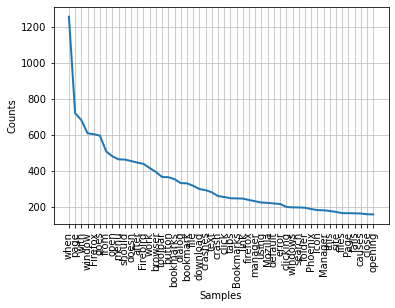

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [46]:
freqDist2 = nltk.FreqDist(largewords)
freqDist2.plot(50)

In [47]:
# wordcloud

from wordcloud import WordCloud

In [48]:
myWordCloud = WordCloud().generate_from_frequencies(freqDist2)

In [49]:
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

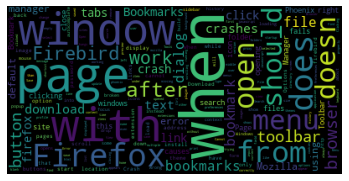

In [50]:
plt.imshow(myWordCloud)
plt.axis('off')

In [51]:
#TRY: remove stop words and then build the word cloud 

In [52]:
#Text Preprocessing pipeline

def preprocessText(myText):
    tweet = myText
    tweet.lower()
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet)
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet)
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub(r'[^\w]', ' ', tweet)
    tweet = ' '.join([Word(word).lemmatize() for word in tweet.split()])
    return tweet



In [53]:
mydata = "How to take control of your #debt https://personal.vanguard.com/us/insights/saving-investing/debt-management. (@PrepareToWin)"

In [54]:
preprocessText(mydata)

'How to take control of your debt URL AT_USER'